## Chapter 1.2: Data Structure and Manipulation
***
In the previous tutorial we saw how we can create a model by calling a few lines of code from imported data. However modelling tends to be an iterative process. Here we will explore the tools that `GemPy` with the help of `pandas` offers to modify the input data of a model.

There is 5 main  funtion "types" in GemPy:

- *create*: 
    - create new objects
    - return the objects
 
- *set*
    - set given values **inplace**

- *update*
    - update dataframe or other attribute from other object or many objects. Usually this object is not passed as argument (this is the main difference with map)

- *map*
    - update dataframe (so far mainly df) or other attribute from an object to another object.
    - Completelly directed. One attribute/property is updated by another one.
    - In general, we map_from so the method is in the mutated object.

- *get*
    - return an image of the object
    
The intention is that a function/method that does not fall in any of these categories has a name (verb in principle) self explanatory. 


As always we start importing the usual packages and reading expample data:

<p align="center"><iframe src="https://atlas.mindmup.com/2018/11/ca2c3230ddc511e887555f7d8bb30b4d/gempy_mind_map/index.html"></iframe></p>


In [1]:
from IPython.display import IFrame    
IFrame("https://atlas.mindmup.com/2018/11/ca2c3230ddc511e887555f7d8bb30b4d/gempy_mind_map/index.html",
      width=1000, height=1000)

../../gempy/core/gempy_front.py:665: FutureWarning: create_data will get deprecated in the next version of gempy. It still exist only to keepthe behaviour equal to older version. Use init_data.
  "the behaviour equal to older version. Use init_data.", FutureWarning)


No id or order_series in the input
Length of formation_names does not match number of formations


../../gempy/core/gempy_front.py:110: FutureWarning: values_to_default option will get deprecated in the next version of gempy. It still exist only to keep the behaviour equal to older version. See set_values_to_default.
  "to keep the behaviour equal to older version. See set_values_to_default.", FutureWarning)


Length of formation_names does not match number of formations
already basement


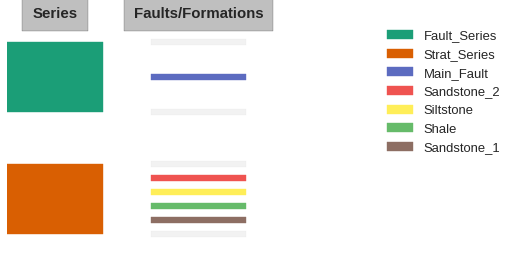

In [2]:
# These two lines are necessary only if GemPy is not installed
import sys, os
sys.path.append("../..")

# Importing GemPy
import gempy as gp

# Embedding matplotlib figures in the notebooks
%matplotlib inline

# Importing auxiliary libraries
import numpy as np
import pandas as pn
import matplotlib.pyplot as plt

# Importing the data from CSV-files and setting extent and resolution
geo_model = gp.create_data([0,2000.,0,2000.,0,2000.],[50,50,50], 
      path_o = os.pardir+"/input_data/tut_chapter1/simple_fault_model_orientations.csv",
      path_i = os.pardir+"/input_data/tut_chapter1/simple_fault_model_points.csv") 

# Assigning series to formations as well as their order (timewise)
gp.set_series(geo_model, {"Fault_Series":'Main_Fault', 
                         "Strat_Series": ('Sandstone_2','Siltstone',
                                          'Shale', 'Sandstone_1')},
                       order_series = ["Fault_Series", 'Strat_Series'],
                       order_formations=['Main_Fault', 
                                         'Sandstone_2','Siltstone',
                                         'Shale', 'Sandstone_1',
                                         ], verbose=1) 

The class `gempy.core.model.Model` works as the parent container of our project. Therefore the main step of any project is to create an instance of this class. In the official documentation we use normally geo_model (geo_data in the past) as name of this instance.

When we instiantiate a `Model` object we full data structure is created. By using `gp.init_data` and `set_series` we set the default values -- given the attributes -- to all of fields. Data is stored in pandas dataframes. With `gp.get_data` and the name of the data object it is possible to have access to the dataframes: 

`str`['all', 'interfaces', 'orientations', 'formations', 'series', 'faults', 'faults_relations', 
        additional data]
        
These dataframes are stored in specific objects. These objects contain the specific methods to manipulate them. You access these objects with the spectific getter or as a attribute of `Model`

### Formations:

The *df* formation contain two properties. *id* refers to the order of the formation on the sequential pile, i.e. the strict order of computation. *values* on the other hand is the final value that each voxel will have after discretization. This may be useful for example in the case we want to map a specific geophysical property (such as density) to a given unity. By default both are the same since to discretize lithological units the value is arbitrary.

In [3]:
formation = gp.get_formations(geo_model)

In [4]:
# This is a GemPy object. The __rep__ has been overrided to show the df (an attribute of the object)
formation

,formation,series,id,isBasement
0,Main_Fault,Fault_Series,1,False
1,Sandstone_2,Strat_Series,2,False
2,Siltstone,Strat_Series,3,False
3,Shale,Strat_Series,4,False
4,Sandstone_1,Strat_Series,5,False
5,default_formation_0,Fault_Series,6,True


Alternatively we can access the dataframe by:

In [5]:
gp.get_data(geo_model, 'formations')

,formation,series,id,isBasement
0,Main_Fault,Fault_Series,1,False
1,Sandstone_2,Strat_Series,2,False
2,Siltstone,Strat_Series,3,False
3,Shale,Strat_Series,4,False
4,Sandstone_1,Strat_Series,5,False
5,default_formation_0,Fault_Series,6,True


### Series

In [6]:
series = gp.get_series(geo_model)
series

,order_series,BottomRelation
Fault_Series,1,NaN
Strat_Series,2,NaN


In [7]:
gp.get_data(geo_model, 'series')

,order_series,BottomRelation
Fault_Series,1,NaN
Strat_Series,2,NaN


### Faults

The *df faults* is used to charectirize which *mathematical series* behave as fault and if mentioned faults are finite or infinite:

In [8]:
gp.get_faults(geo_model)

,isFault
Fault_Series,True
Strat_Series,False


In [9]:
gp.get_data(geo_model, 'faults')

,isFault
Fault_Series,True
Strat_Series,False


Finally we have the *faults relations df* which captures which *mathematical series* a given fault offset in order to reproduce complex faulting networks

In [10]:
gp.get_data(geo_model, 'faults_relations_df')

,Default series
Default series,False


### Additional Data

In [11]:
gp.get_additional_data(geo_model)

values
Structure isLith                                                                     True
          isFault                                                                    True
          number faults                                                                 1
          number formations                                                             6
          number formations per series                                             [1, 5]
          len formations interfaces                                    [5, 8, 13, 16, 15]
          len series interfaces                                                   [5, 52]
          len series orientations                                                  [1, 2]
Options   dtype                                                                   float64
          output                                                                  geology
          theano_optimizer                                                   fast_compile
          device                                                                      cpu
          verbosity                                                                   NaN
Kringing  range                                                                    3464.1
          $C_o$                                                                    285714
          drift equations                                                          [3, 3]
          nugget grad                                                                0.01
          nugget scalar                                                             1e-06
Rescaling rescaling factor                                                           3800
          centers                       X     850.0
Y    1000.0
Z     900.0
dtype: flo...

In [12]:
gp.get_data(geo_model, 'additional data')

values
Structure isLith                                                                     True
          isFault                                                                    True
          number faults                                                                 1
          number formations                                                             6
          number formations per series                                             [1, 5]
          len formations interfaces                                    [5, 8, 13, 16, 15]
          len series interfaces                                                   [5, 52]
          len series orientations                                                  [1, 2]
Options   dtype                                                                   float64
          output                                                                  geology
          theano_optimizer                                                   fast_compile
          device                                                                      cpu
          verbosity                                                                   NaN
Kringing  range                                                                    3464.1
          $C_o$                                                                    285714
          drift equations                                                          [3, 3]
          nugget grad                                                                0.01
          nugget scalar                                                             1e-06
Rescaling rescaling factor                                                           3800
          centers                       X     850.0
Y    1000.0
Z     900.0
dtype: flo...

###  Interfaces

These two DataFrames (df from now on) will contain the individual information of each point at an interface or orientation. Some properties of this table are mapped from the *df* below.

In [13]:
gp.get_data(geo_model, 'interfaces').head()

,X,Y,Z,formation,series,id,order_series,isFault
0,800.0,50.0,750.0,Shale,Strat_Series,4,2,False
1,800.0,150.0,700.0,Shale,Strat_Series,4,2,False
2,800.0,300.0,700.0,Shale,Strat_Series,4,2,False
3,800.0,500.0,800.0,Shale,Strat_Series,4,2,False
4,800.0,1000.0,1000.0,Shale,Strat_Series,4,2,False


### Orientations

In [14]:
gp.get_data(geo_model, 'orientations').head()

,X,Y,Z,G_x,G_y,G_z,dip,azimuth,polarity,formation,series,id,order_series,isFault
0,1000.0,1000.0,950.000,0.316229,1.000019e-12,0.948683,18.435,90.0,1.0,Shale,Strat_Series,4,2,False
1,400.0,1000.0,1400.000,0.316229,1.000019e-12,0.948683,18.435,90.0,1.0,Sandstone_2,Strat_Series,2,2,False
2,500.0,1000.0,864.602,-0.948683,9.998257e-13,0.316229,71.565,270.0,1.0,Main_Fault,Fault_Series,1,1,True


These objects contain and represent all necessary data to create a model.

### Adding, modifing deleting

In [15]:
geo_model.modify_interfaces([0], X=[2000], Y=[2000], Z=[2000])

#### Passing a vtk object to real time update

In [16]:
v = gp.plot.plot_data_3D(geo_model)

closing vtk


In [17]:
geo_model.modify_interfaces([0], v,  X=[2000], Y=[2000], Z=[1000])

In [18]:
v.close()

##### Real time surface updating


In [19]:
gp.set_interpolation_data(geo_model)

Compiling theano function...
Compilation Done!
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of df:  1


,values
dtype,float64
output,geology
theano_optimizer,fast_compile
device,cpu
verbosity,NaN


In [20]:
gp.compute_model(geo_model)


Lithology ids 
  [6. 6. 6. ... 2. 2. 2.] 
Lithology scalar field 
  [30.22043419 30.23028183 30.24014664 ... 30.79774284 30.81193924
 30.82598877] 
Fault block 
  [[1. 1. 1. ... 2. 2. 2.]]

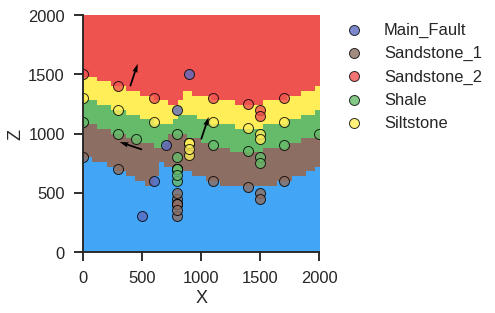

In [21]:
gp.plot.plot_section(geo_model, 25, plot_data=True)

In [22]:
v = gp.plot.plot_surfaces_3D_real_time(geo_model, None, None)

holding... Use vtk.resume to go back to the interactive window


In [25]:
geo_model.modify_interfaces([0], v,  X=[2000], Y=[2000], Z=[1500])

In [26]:
v.resume()

closing vtk
